#  COMP41680 A1: Data Collection & Preparation
## Ciaran Nolan - 15329936


### Note: 
Due to COVID19, the volume of traffic on the roads decreased significantly as more and more companies opted to work from home. Unfortunately, it was too late to change API when the lockdown was announced. My results are during the time of the initial social distancing and work from home scenarios, so hopefully this can be accounted for when I make my observations,

### Task 1 - Data Identification:

The base of this assignment begins with the choice of API. A number of APIs re explored in this project.

#### Dublin Public Transport Services - Real-time Passenger Information (RTPI) API
##### 1.1 Details
The RTPI API provides information for major public transport operators such as

* Dublin Bus
* Bus Eireann
* Irish Rail
* Luas

For the purpose of this assignment, Dublin Bus is the operator is choice. This is due to Dublin busses extensive network in the city, with a higher volume of available data.

The aim of using this API:

* Gather Punctuality Information for all bus routes and all stops across the dublin bus network.
* Creating a database of results base on:
    * Routes
    * Stops
    * Days of the Week
* Correlating punctuality over different days of the week
* Correating punctuality with proximity to Dublin City Centre
* Comparing routes and stops to find the best and worst punctuality across the Dublin Bus Network
* Since Dublin bus creates the bus schedules, I am also evaluating how well Dublin bus predicts bus travel times across the span of a week. Particularly how well the account for traffic in inner city settings.

##### 1.2 API Usage
The documentation for the API can be found here: [API Doc](https://data.smartdublin.ie/dataset/real-time-passenger-information-rtpi-for-dublin-bus-bus-eireann-luas-and-irish-rail/resource/4b9f2c4f-6bf5-4958-a43a-f12dab04cf61)

The RTPI APi has no limitations on usage, making data collection an easier process with more room for error when making changes.

The API doc provides a complete list of publicly available endpoints, all of which are available in either JSON or XML. Having experince with JSON previous to theis assignment, this format was chosen.

There are two main features of this API, in relation to Dublin Bus Information.
* Static information pertaining to Dublin Bus' available routes, the stops served by those routes and the respective route's timetable
* Real time information for a particular bus stop:
    * Unfiltered provides a list of results for any bus route that serves the particular stop.
    * Filtering by route provides real time information for a specific route at that stop.
  
##### 1.3 System Dependencies
The first step of building this system is to import the packages that this assignment depends on.

In [63]:
#http requests
import requests
#json manipulation
import json
import datetime
# file handling and directory manipulation 
import os
from datetime import date
import calendar
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from operator import itemgetter


##### 1.4 API Request
Next a general function to handle all API requests to the RTPI API, using its base API and endpoint based on the function argument.

In [28]:
# Function to retrieve a particular end point using the base API route
def retrieve_api_request(api_route):
    base_api_url = "https://data.smartdublin.ie/cgi-bin/rtpi/"
    # combine the base url and the target route to creat the endpoint.
    routes_endpoint = base_api_url + api_route
    # make the get request to retireve the desired information.
    api_response = requests.get(url = routes_endpoint)
    # parse the API response as JSON
    return api_response.json()

### Task 2 & Task 3 - Data Collection & Data Preparation
Task 2 and 3 are, as can be naturally expected in some cases intertwined. Due to the nature of certain RTPI API responses, two phases of Task 2 & 3 are completed. In these cases task 3 is limited to data prep. Data visualisation happens later.

#### Phase 1: Static Route and Stop Information
The first step is to gather information on the Dublin Bus Network. This boils down to:
* Route Numbers
* Stops associated with each Route

Knowing all the routes provided and the stops they serve, we can begin to investigate their punctuality.

##### Route Numbers
The RTPI API has a single API request that returns all routes run by Dublin bus, with the route being "routelistinformation?operator=bac". Note here 'bac' corresponds to Bus Átha Cliath, the translation of Dublin bus in Gaeilge.

###### Route Retrieval:

In [7]:
# Single Use
def write_routes_numbers_data_to_file():
    api_res = retrieve_api_request("routelistinformation?operator=bac")
    bus_routes = [route['route'] for route in api_res['results']]
    #write the api response to file
    with open('test.json','w') as f:
        json.dump(bus_routes, f, ensure_ascii=False)

write_routes_numbers_data_to_file()  

Examining the response of this API call:

```yaml

{"errorcode":"0","errormessage":"","numberofresults":473,"timestamp":"30\/03\/2020 16:41:32","results":[{"operator":"bac","operatortype":1,"route":"1"},{"operator":"bac","operatortype":1,"route":"100"},{"operator":"bac","operatortype":1,"route":"100X"},{"operator":"bac","operatortype":1,"route":"101"},{"operator":"bac","operatortype":1,"route":"101N"},{"operator":"bac","operatortype":1,"route":"101X"},{"operator":"bac","operatortype":1,"route":"102"},{"operator":"bac","operatortype":1,"route":"103"},{"operator":"bac","operatortype":1,"route":"103X"},{"operator":"bac","operatortype":1,"route":"104"},{"operator":"bac","operatortype":1,"route":"105"},{"operator":"bac","operatortype":1,"route":"105X"},{"operator":"bac","operatortype":1,"route":"107"},{"operator":"bac","operatortype":1,"route":"108"},{"operator":"bac","operatortype":1,"route":"109"},{"operator":"bac","operatortype":1,"route":"109A"},{"operator":"bac","operatortype":1,"route":"109B"},{"operator":"bac","operatortype":1,"route":"109X"},{"operator":"bac","operatortype":1,"route":"11"},{"operator":"bac","operatortype":1,"route":"111"},{"operator":"bac","operatortype":1,"route":"111A"},{"operator":"bac","operatortype":1,"route":"111X"},{"operator":"bac","operatortype":1,"route":"114"},{"operator":"bac","operatortype":1,"route":"115"},{"operator":"bac","operatortype":1,"route":"115A"},{"operator":"bac","operatortype":1,"route":"116"},{"operator":"bac","operatortype":1,"route":"118"},{"operator":"bac","operatortype":1,"route":"120"},{"operator":"bac","operatortype":1,"route":"121"},{"operator":"bac","operatortype":1,"route":"122"},{"operator":"bac","operatortype":1,"route":"123"},{"operator":"bac","operatortype":1,"route":"124"},{"operator":"bac","operatortype":1,"route":"126"},{"operator":"bac","operatortype":1,"route":"126N"},{"operator":"bac","operatortype":1,"route":"13"},{"operator":"bac","operatortype":1,"route":"130"},{"operator":"bac","operatortype":1,"route":"132"},{"operator":"bac","operatortype":1,"route":"133"},{"operator":"bac","operatortype":1,"route":"133X"},{"operator":"bac","operatortype":1,"route":"134"},{"operator":"bac","operatortype":1,"route":"135"},{"operator":"bac","operatortype":1,"route":"136"},{"operator":"bac","operatortype":1,"route":"14"},{"operator":"bac","operatortype":1,"route":"140"},{"operator":"bac","operatortype":1,"route":"142"},{"operator":"bac","operatortype":1,"route":"145"},{"operator":"bac","operatortype":1,"route":"14C"},{"operator":"bac","operatortype":1,"route":"15"},{"operator":"bac","operatortype":1,"route":"150"},{"operator":"bac","operatortype":1,"route":"151"},{"operator":"bac","operatortype":1,"route":"155"},{"operator":"bac","operatortype":1,"route":"15A"},{"operator":"bac","operatortype":1,"route":"15B"},{"operator":"bac","operatortype":1,"route":"15D"},{"operator":"bac","operatortype":1,"route":"16"},{"operator":"bac","operatortype":1,"route":"160"},{"operator":"bac","operatortype":1,"route":"161"},{"operator":"bac","operatortype":1,"route":"162"},{"operator":"bac","operatortype":1,"route":"163"},{"operator":"bac","operatortype":1,"route":"166"},{"operator":"bac","operatortype":1,"route":"167"},{"operator":"bac","operatortype":1,"route":"168"},{"operator":"bac","operatortype":1,"route":"16A"},{"operator":"bac","operatortype":1,"route":"16C"},{"operator":"bac","operatortype":1,"route":"16D"},{"operator":"bac","operatortype":1,"route":"17"},{"operator":"bac","operatortype":1,"route":"173"},{"operator":"bac","operatortype":1,"route":"174"},{"operator":"bac","operatortype":1,"route":"174A"},{"operator":"bac","operatortype":1,"route":"174B"},{"operator":"bac","operatortype":1,"route":"175"},{"operator":"bac","operatortype":1,"route":"175A"},{"operator":"bac","operatortype":1,"route":"17A"},{"operator":"bac","operatortype":1,"route":"18"},{"operator":"bac","operatortype":1,"route":"182"},{"operator":"bac","operatortype":1,"route":"182A"},{"operator":"bac","operatortype":1,"route":"184"},{"operator":"bac","operatortype":1,"route":"185"},{"operator":"bac","operatortype":1,"route":"187"},{"operator":"bac","operatortype":1,"route":"189"},{"operator":"bac","operatortype":1,"route":"190"},{"operator":"bac","operatortype":1,"route":"2"},{"operator":"bac","operatortype":1,"route":"20"},{"operator":"bac","operatortype":1,"route":"201"},{"operator":"bac","operatortype":1,"route":"202"},{"operator":"bac","operatortype":1,"route":"203"},{"operator":"bac","operatortype":1,"route":"205"},{"operator":"bac","operatortype":1,"route":"206"},{"operator":"bac","operatortype":1,"route":"207"},{"operator":"bac","operatortype":1,"route":"207A"},{"operator":"bac","operatortype":1,"route":"208"},{"operator":"bac","operatortype":1,"route":"209"},{"operator":"bac","operatortype":1,"route":"209A"},{"operator":"bac","operatortype":1,"route":"213"},{"operator":"bac","operatortype":1,"route":"214"},{"operator":"bac","operatortype":1,"route":"215"},{"operator":"bac","operatortype":1,"route":"215A"},{"operator":"bac","operatortype":1,"route":"216"},{"operator":"bac","operatortype":1,"route":"219"},{"operator":"bac","operatortype":1,"route":"22"},{"operator":"bac","operatortype":1,"route":"220"},{"operator":"bac","operatortype":1,"route":"220X"},{"operator":"bac","operatortype":1,"route":"221"},{"operator":"bac","operatortype":1,"route":"223"},{"operator":"bac","operatortype":1,"route":"223E"},{"operator":"bac","operatortype":1,"route":"226"},{"operator":"bac","operatortype":1,"route":"226A"},{"operator":"bac","operatortype":1,"route":"23"},{"operator":"bac","operatortype":1,"route":"233"},{"operator":"bac","operatortype":1,"route":"235"},{"operator":"bac","operatortype":1,"route":"236"},{"operator":"bac","operatortype":1,"route":"237"},{"operator":"bac","operatortype":1,"route":"238"},{"operator":"bac","operatortype":1,"route":"239"},{"operator":"bac","operatortype":1,"route":"240"},{"operator":"bac","operatortype":1,"route":"241"},{"operator":"bac","operatortype":1,"route":"243"},{"operator":"bac","operatortype":1,"route":"245"},{"operator":"bac","operatortype":1,"route":"248"},{"operator":"bac","operatortype":1,"route":"25"},{"operator":"bac","operatortype":1,"route":"252"},{"operator":"bac","operatortype":1,"route":"257"},{"operator":"bac","operatortype":1,"route":"258"},{"operator":"bac","operatortype":1,"route":"259"},{"operator":"bac","operatortype":1,"route":"25A"},{"operator":"bac","operatortype":1,"route":"25B"},{"operator":"bac","operatortype":1,"route":"25D"},{"operator":"bac","operatortype":1,"route":"25X"},{"operator":"bac","operatortype":1,"route":"26"},{"operator":"bac","operatortype":1,"route":"260"},{"operator":"bac","operatortype":1,"route":"261"},{"operator":"bac","operatortype":1,"route":"27"},{"operator":"bac","operatortype":1,"route":"270"},{"operator":"bac","operatortype":1,"route":"271"},{"operator":"bac","operatortype":1,"route":"272"},{"operator":"bac","operatortype":1,"route":"273"},{"operator":"bac","operatortype":1,"route":"274"},{"operator":"bac","operatortype":1,"route":"275"},{"operator":"bac","operatortype":1,"route":"275A"},{"operator":"bac","operatortype":1,"route":"276"},{"operator":"bac","operatortype":1,"route":"278"},{"operator":"bac","operatortype":1,"route":"279"},{"operator":"bac","operatortype":1,"route":"279A"},{"operator":"bac","operatortype":1,"route":"27A"},{"operator":"bac","operatortype":1,"route":"27B"},{"operator":"bac","operatortype":1,"route":"27X"},{"operator":"bac","operatortype":1,"route":"280"},{"operator":"bac","operatortype":1,"route":"282"},{"operator":"bac","operatortype":1,"route":"284"},{"operator":"bac","operatortype":1,"route":"29A"},{"operator":"bac","operatortype":1,"route":"3"},{"operator":"bac","operatortype":1,"route":"30"},{"operator":"bac","operatortype":1,"route":"301"},{"operator":"bac","operatortype":1,"route":"302"},{"operator":"bac","operatortype":1,"route":"303"},{"operator":"bac","operatortype":1,"route":"304"},{"operator":"bac","operatortype":1,"route":"304A"},{"operator":"bac","operatortype":1,"route":"304X"},{"operator":"bac","operatortype":1,"route":"305"},{"operator":"bac","operatortype":1,"route":"306"},{"operator":"bac","operatortype":1,"route":"31"},{"operator":"bac","operatortype":1,"route":"313"},{"operator":"bac","operatortype":1,"route":"314"},{"operator":"bac","operatortype":1,"route":"31A"},{"operator":"bac","operatortype":1,"route":"31B"},{"operator":"bac","operatortype":1,"route":"31D"},{"operator":"bac","operatortype":1,"route":"32"},{"operator":"bac","operatortype":1,"route":"320"},{"operator":"bac","operatortype":1,"route":"321"},{"operator":"bac","operatortype":1,"route":"323"},{"operator":"bac","operatortype":1,"route":"328"},{"operator":"bac","operatortype":1,"route":"329"},{"operator":"bac","operatortype":1,"route":"32A"},{"operator":"bac","operatortype":1,"route":"32B"},{"operator":"bac","operatortype":1,"route":"32X"},{"operator":"bac","operatortype":1,"route":"33"},{"operator":"bac","operatortype":1,"route":"332"},{"operator":"bac","operatortype":1,"route":"333"},{"operator":"bac","operatortype":1,"route":"334"},{"operator":"bac","operatortype":1,"route":"336"},{"operator":"bac","operatortype":1,"route":"338"},{"operator":"bac","operatortype":1,"route":"33A"},{"operator":"bac","operatortype":1,"route":"33B"},{"operator":"bac","operatortype":1,"route":"33D"},{"operator":"bac","operatortype":1,"route":"33E"},{"operator":"bac","operatortype":1,"route":"33X"},{"operator":"bac","operatortype":1,"route":"341"},{"operator":"bac","operatortype":1,"route":"343"},{"operator":"bac","operatortype":1,"route":"343X"},{"operator":"bac","operatortype":1,"route":"345"},{"operator":"bac","operatortype":1,"route":"346"},{"operator":"bac","operatortype":1,"route":"347"},{"operator":"bac","operatortype":1,"route":"348"},{"operator":"bac","operatortype":1,"route":"349"},{"operator":"bac","operatortype":1,"route":"350"},{"operator":"bac","operatortype":1,"route":"355"},{"operator":"bac","operatortype":1,"route":"360"},{"operator":"bac","operatortype":1,"route":"360A"},{"operator":"bac","operatortype":1,"route":"362"},{"operator":"bac","operatortype":1,"route":"365"},{"operator":"bac","operatortype":1,"route":"366"},{"operator":"bac","operatortype":1,"route":"37"},{"operator":"bac","operatortype":1,"route":"370"},{"operator":"bac","operatortype":1,"route":"371"},{"operator":"bac","operatortype":1,"route":"372"},{"operator":"bac","operatortype":1,"route":"373"},{"operator":"bac","operatortype":1,"route":"374"},{"operator":"bac","operatortype":1,"route":"375"},{"operator":"bac","operatortype":1,"route":"377"},{"operator":"bac","operatortype":1,"route":"378"},{"operator":"bac","operatortype":1,"route":"379"},{"operator":"bac","operatortype":1,"route":"38"},{"operator":"bac","operatortype":1,"route":"380"},{"operator":"bac","operatortype":1,"route":"381"},{"operator":"bac","operatortype":1,"route":"382"},{"operator":"bac","operatortype":1,"route":"383"},{"operator":"bac","operatortype":1,"route":"385"},{"operator":"bac","operatortype":1,"route":"38A"},{"operator":"bac","operatortype":1,"route":"38B"},{"operator":"bac","operatortype":1,"route":"38D"},{"operator":"bac","operatortype":1,"route":"39"},{"operator":"bac","operatortype":1,"route":"39A"},{"operator":"bac","operatortype":1,"route":"39X"},{"operator":"bac","operatortype":1,"route":"4"},{"operator":"bac","operatortype":1,"route":"40"},{"operator":"bac","operatortype":1,"route":"401"},{"operator":"bac","operatortype":1,"route":"402"},{"operator":"bac","operatortype":1,"route":"403"},{"operator":"bac","operatortype":1,"route":"404"},{"operator":"bac","operatortype":1,"route":"405"},{"operator":"bac","operatortype":1,"route":"407"},{"operator":"bac","operatortype":1,"route":"409"},{"operator":"bac","operatortype":1,"route":"40B"},{"operator":"bac","operatortype":1,"route":"40D"},{"operator":"bac","operatortype":1,"route":"40E"},{"operator":"bac","operatortype":1,"route":"41"},{"operator":"bac","operatortype":1,"route":"417"},{"operator":"bac","operatortype":1,"route":"419"},{"operator":"bac","operatortype":1,"route":"41A"},{"operator":"bac","operatortype":1,"route":"41B"},{"operator":"bac","operatortype":1,"route":"41C"},{"operator":"bac","operatortype":1,"route":"41D"},{"operator":"bac","operatortype":1,"route":"41X"},{"operator":"bac","operatortype":1,"route":"42"},{"operator":"bac","operatortype":1,"route":"424"},{"operator":"bac","operatortype":1,"route":"425"},{"operator":"bac","operatortype":1,"route":"425A"},{"operator":"bac","operatortype":1,"route":"429"},{"operator":"bac","operatortype":1,"route":"42D"},{"operator":"bac","operatortype":1,"route":"43"},{"operator":"bac","operatortype":1,"route":"434"},{"operator":"bac","operatortype":1,"route":"438"},{"operator":"bac","operatortype":1,"route":"44"},{"operator":"bac","operatortype":1,"route":"440"},{"operator":"bac","operatortype":1,"route":"442"},{"operator":"bac","operatortype":1,"route":"443"},{"operator":"bac","operatortype":1,"route":"444"},{"operator":"bac","operatortype":1,"route":"445"},{"operator":"bac","operatortype":1,"route":"446"},{"operator":"bac","operatortype":1,"route":"447"},{"operator":"bac","operatortype":1,"route":"44B"},{"operator":"bac","operatortype":1,"route":"45"},{"operator":"bac","operatortype":1,"route":"450"},{"operator":"bac","operatortype":1,"route":"451"},{"operator":"bac","operatortype":1,"route":"454"},{"operator":"bac","operatortype":1,"route":"455"},{"operator":"bac","operatortype":1,"route":"456"},{"operator":"bac","operatortype":1,"route":"457"},{"operator":"bac","operatortype":1,"route":"458"},{"operator":"bac","operatortype":1,"route":"45A"},{"operator":"bac","operatortype":1,"route":"460"},{"operator":"bac","operatortype":1,"route":"461"},{"operator":"bac","operatortype":1,"route":"462"},{"operator":"bac","operatortype":1,"route":"463"},{"operator":"bac","operatortype":1,"route":"464"},{"operator":"bac","operatortype":1,"route":"465"},{"operator":"bac","operatortype":1,"route":"466"},{"operator":"bac","operatortype":1,"route":"467"},{"operator":"bac","operatortype":1,"route":"468"},{"operator":"bac","operatortype":1,"route":"469"},{"operator":"bac","operatortype":1,"route":"46A"},{"operator":"bac","operatortype":1,"route":"46E"},{"operator":"bac","operatortype":1,"route":"47"},{"operator":"bac","operatortype":1,"route":"470"},{"operator":"bac","operatortype":1,"route":"471"},{"operator":"bac","operatortype":1,"route":"474"},{"operator":"bac","operatortype":1,"route":"475"},{"operator":"bac","operatortype":1,"route":"476"},{"operator":"bac","operatortype":1,"route":"479"},{"operator":"bac","operatortype":1,"route":"480"},{"operator":"bac","operatortype":1,"route":"483"},{"operator":"bac","operatortype":1,"route":"486"},{"operator":"bac","operatortype":1,"route":"487"},{"operator":"bac","operatortype":1,"route":"489"},{"operator":"bac","operatortype":1,"route":"49"},{"operator":"bac","operatortype":1,"route":"490"},{"operator":"bac","operatortype":1,"route":"491"},{"operator":"bac","operatortype":1,"route":"492"},{"operator":"bac","operatortype":1,"route":"494"},{"operator":"bac","operatortype":1,"route":"495"},{"operator":"bac","operatortype":1,"route":"51"},{"operator":"bac","operatortype":1,"route":"51D"},{"operator":"bac","operatortype":1,"route":"51X"},{"operator":"bac","operatortype":1,"route":"52"},{"operator":"bac","operatortype":1,"route":"53"},{"operator":"bac","operatortype":1,"route":"53A"},{"operator":"bac","operatortype":1,"route":"54A"},{"operator":"bac","operatortype":1,"route":"55"},{"operator":"bac","operatortype":1,"route":"56A"},{"operator":"bac","operatortype":1,"route":"59"},{"operator":"bac","operatortype":1,"route":"601"},{"operator":"bac","operatortype":1,"route":"602"},{"operator":"bac","operatortype":1,"route":"603"},{"operator":"bac","operatortype":1,"route":"604"},{"operator":"bac","operatortype":1,"route":"605"},{"operator":"bac","operatortype":1,"route":"61"},{"operator":"bac","operatortype":1,"route":"63"},{"operator":"bac","operatortype":1,"route":"64"},{"operator":"bac","operatortype":1,"route":"65"},{"operator":"bac","operatortype":1,"route":"65B"},{"operator":"bac","operatortype":1,"route":"66"},{"operator":"bac","operatortype":1,"route":"66A"},{"operator":"bac","operatortype":1,"route":"66B"},{"operator":"bac","operatortype":1,"route":"66E"},{"operator":"bac","operatortype":1,"route":"66X"},{"operator":"bac","operatortype":1,"route":"67"},{"operator":"bac","operatortype":1,"route":"67X"},{"operator":"bac","operatortype":1,"route":"68"},{"operator":"bac","operatortype":1,"route":"68A"},{"operator":"bac","operatortype":1,"route":"68X"},{"operator":"bac","operatortype":1,"route":"69"},{"operator":"bac","operatortype":1,"route":"69X"},{"operator":"bac","operatortype":1,"route":"7"},{"operator":"bac","operatortype":1,"route":"70"},{"operator":"bac","operatortype":1,"route":"70D"},{"operator":"bac","operatortype":1,"route":"72"},{"operator":"bac","operatortype":1,"route":"73"},{"operator":"bac","operatortype":1,"route":"747"},{"operator":"bac","operatortype":1,"route":"75"},{"operator":"bac","operatortype":1,"route":"757"},{"operator":"bac","operatortype":1,"route":"76"},{"operator":"bac","operatortype":1,"route":"76A"},{"operator":"bac","operatortype":1,"route":"77A"},{"operator":"bac","operatortype":1,"route":"77X"},{"operator":"bac","operatortype":1,"route":"79"},{"operator":"bac","operatortype":1,"route":"79A"},{"operator":"bac","operatortype":1,"route":"7A"},{"operator":"bac","operatortype":1,"route":"7B"},{"operator":"bac","operatortype":1,"route":"7D"},{"operator":"bac","operatortype":1,"route":"8"},{"operator":"bac","operatortype":1,"route":"83"},{"operator":"bac","operatortype":1,"route":"83A"},{"operator":"bac","operatortype":1,"route":"84"},{"operator":"bac","operatortype":1,"route":"84A"},{"operator":"bac","operatortype":1,"route":"84X"},{"operator":"bac","operatortype":1,"route":"9"},{"operator":"bac","operatortype":1,"route":"A1"},{"operator":"bac","operatortype":1,"route":"A2"},{"operator":"bac","operatortype":1,"route":"B1"},{"operator":"bac","operatortype":1,"route":"bac|1"},{"operator":"bac","operatortype":1,"route":"bac|102"},{"operator":"bac","operatortype":1,"route":"bac|104"},{"operator":"bac","operatortype":1,"route":"bac|11"},{"operator":"bac","operatortype":1,"route":"bac|111"},{"operator":"bac","operatortype":1,"route":"bac|114"},{"operator":"bac","operatortype":1,"route":"bac|116"},{"operator":"bac","operatortype":1,"route":"bac|118"},{"operator":"bac","operatortype":1,"route":"bac|120"},{"operator":"bac","operatortype":1,"route":"bac|122"},{"operator":"bac","operatortype":1,"route":"bac|123"},{"operator":"bac","operatortype":1,"route":"bac|13"},{"operator":"bac","operatortype":1,"route":"bac|130"},{"operator":"bac","operatortype":1,"route":"bac|14"},{"operator":"bac","operatortype":1,"route":"bac|140"},{"operator":"bac","operatortype":1,"route":"bac|142"},{"operator":"bac","operatortype":1,"route":"bac|145"},{"operator":"bac","operatortype":1,"route":"bac|14C"},{"operator":"bac","operatortype":1,"route":"bac|15"},{"operator":"bac","operatortype":1,"route":"bac|150"},{"operator":"bac","operatortype":1,"route":"bac|151"},{"operator":"bac","operatortype":1,"route":"bac|15A"},{"operator":"bac","operatortype":1,"route":"bac|15B"},{"operator":"bac","operatortype":1,"route":"bac|16"},{"operator":"bac","operatortype":1,"route":"bac|161"},{"operator":"bac","operatortype":1,"route":"bac|16A"},{"operator":"bac","operatortype":1,"route":"bac|16C"},{"operator":"bac","operatortype":1,"route":"bac|17"},{"operator":"bac","operatortype":1,"route":"bac|17A"},{"operator":"bac","operatortype":1,"route":"bac|18"},{"operator":"bac","operatortype":1,"route":"bac|184"},{"operator":"bac","operatortype":1,"route":"bac|185"},{"operator":"bac","operatortype":1,"route":"bac|2"},{"operator":"bac","operatortype":1,"route":"bac|220"},{"operator":"bac","operatortype":1,"route":"bac|221"},{"operator":"bac","operatortype":1,"route":"bac|236"},{"operator":"bac","operatortype":1,"route":"bac|238"},{"operator":"bac","operatortype":1,"route":"bac|239"},{"operator":"bac","operatortype":1,"route":"bac|25"},{"operator":"bac","operatortype":1,"route":"bac|25A"},{"operator":"bac","operatortype":1,"route":"bac|25B"},{"operator":"bac","operatortype":1,"route":"bac|25D"},{"operator":"bac","operatortype":1,"route":"bac|25X"},{"operator":"bac","operatortype":1,"route":"bac|26"},{"operator":"bac","operatortype":1,"route":"bac|27"},{"operator":"bac","operatortype":1,"route":"bac|270"},{"operator":"bac","operatortype":1,"route":"bac|27A"},{"operator":"bac","operatortype":1,"route":"bac|27B"},{"operator":"bac","operatortype":1,"route":"bac|27X"},{"operator":"bac","operatortype":1,"route":"bac|29A"},{"operator":"bac","operatortype":1,"route":"bac|3"},{"operator":"bac","operatortype":1,"route":"bac|31"},{"operator":"bac","operatortype":1,"route":"bac|31A"},{"operator":"bac","operatortype":1,"route":"bac|31B"},{"operator":"bac","operatortype":1,"route":"bac|32"},{"operator":"bac","operatortype":1,"route":"bac|32A"},{"operator":"bac","operatortype":1,"route":"bac|32B"},{"operator":"bac","operatortype":1,"route":"bac|32X"},{"operator":"bac","operatortype":1,"route":"bac|33"},{"operator":"bac","operatortype":1,"route":"bac|33A"},{"operator":"bac","operatortype":1,"route":"bac|33B"},{"operator":"bac","operatortype":1,"route":"bac|33X"},{"operator":"bac","operatortype":1,"route":"bac|37"},{"operator":"bac","operatortype":1,"route":"bac|38"},{"operator":"bac","operatortype":1,"route":"bac|38A"},{"operator":"bac","operatortype":1,"route":"bac|38B"},{"operator":"bac","operatortype":1,"route":"bac|38D"},{"operator":"bac","operatortype":1,"route":"bac|39"},{"operator":"bac","operatortype":1,"route":"bac|39A"},{"operator":"bac","operatortype":1,"route":"bac|4"},{"operator":"bac","operatortype":1,"route":"bac|40"},{"operator":"bac","operatortype":1,"route":"bac|40B"},{"operator":"bac","operatortype":1,"route":"bac|40D"},{"operator":"bac","operatortype":1,"route":"bac|41"},{"operator":"bac","operatortype":1,"route":"bac|41A"},{"operator":"bac","operatortype":1,"route":"bac|41B"},{"operator":"bac","operatortype":1,"route":"bac|41C"},{"operator":"bac","operatortype":1,"route":"bac|41X"},{"operator":"bac","operatortype":1,"route":"bac|42"},{"operator":"bac","operatortype":1,"route":"bac|43"},{"operator":"bac","operatortype":1,"route":"bac|44"},{"operator":"bac","operatortype":1,"route":"bac|44B"},{"operator":"bac","operatortype":1,"route":"bac|45"},{"operator":"bac","operatortype":1,"route":"bac|45A"},{"operator":"bac","operatortype":1,"route":"bac|46A"},{"operator":"bac","operatortype":1,"route":"bac|46E"},{"operator":"bac","operatortype":1,"route":"bac|47"},{"operator":"bac","operatortype":1,"route":"bac|49"},{"operator":"bac","operatortype":1,"route":"bac|51D"},{"operator":"bac","operatortype":1,"route":"bac|51X"},{"operator":"bac","operatortype":1,"route":"bac|53"},{"operator":"bac","operatortype":1,"route":"bac|54A"},{"operator":"bac","operatortype":1,"route":"bac|56A"},{"operator":"bac","operatortype":1,"route":"bac|59"},{"operator":"bac","operatortype":1,"route":"bac|61"},{"operator":"bac","operatortype":1,"route":"bac|63"},{"operator":"bac","operatortype":1,"route":"bac|65"},{"operator":"bac","operatortype":1,"route":"bac|65B"},{"operator":"bac","operatortype":1,"route":"bac|66"},{"operator":"bac","operatortype":1,"route":"bac|66A"},{"operator":"bac","operatortype":1,"route":"D1"},{"operator":"bac","operatortype":1,"route":"Green"},{"operator":"bac","operatortype":1,"route":"NX"},{"operator":"bac","operatortype":1,"route":"Red"},{"operator":"bac","operatortype":1,"route":"S1"},{"operator":"bac","operatortype":1,"route":"S2"},{"operator":"bac","operatortype":1,"route":"X12"},{"operator":"bac","operatortype":1,"route":"X2"},{"operator":"bac","operatortype":1,"route":"X20"},{"operator":"bac","operatortype":1,"route":"X30"},{"operator":"bac","operatortype":1,"route":"X4"},{"operator":"bac","operatortype":1,"route":"X51"},{"operator":"bac","operatortype":1,"route":"X8"},{"operator":"bac","operatortype":1,"route":"XXX"}]} 
```

Firstly, there is a considerable amount of uneeded duplicate data in this response. We already know from specifying the route parameter that we expect Dublin Bus routes exclusively. So, the "operator" and "operatortype" key value pairs are irelevant for the further work I intend to do.

Next, there is also duplications of route numbers themselves. One form contains a single stringed integer, i.e. "145", while another set contains "bac|145". No further url paramters remove these duplicate entries, so data processing will have to take care of it.

Finally, doing a reality check on some of the routes listed show that some of the return routes actually do not belong to Dublin Bus at all, rather Bus Eireann and Luas. Some obvious entries would be "Green" and "Red" describing the two Luas services, or the "X8" for Bus Eireann. So like the the duplicate Dublin Bus routes, Post processing for these incorrect entries is required

###### Route Processing
Steps: 

1. Extract "route" from each entry in the response.
From the above cell, using write_routes_numbers_data_to_file(), we can see this already in process. After filtering for only 'route; and writing to bus.json. The current state of the route file:


```yaml

["1", "100", "100X", "101", "101N", "101X", "102", "103", "103X", "104", "105", "105X", "107", "108", "109", "109A", "109B", "109X", "11", "111", "111A", "111X", "114", "115", "115A", "116", "118", "120", "121", "122", "123", "124", "126", "126N", "13", "130", "132", "133", "133X", "134", "135", "136", "14", "140", "142", "145", "14C", "15", "150", "151", "155", "15A", "15B", "15D", "16", "160", "161", "162", "163", "166", "167", "168", "16A", "16C", "16D", "17", "173", "174", "174A", "174B", "175", "175A", "17A", "18", "182", "182A", "184", "185", "187", "189", "190", "2", "20", "201", "202", "203", "205", "206", "207", "207A", "208", "209", "209A", "213", "214", "215", "215A", "216", "219", "22", "220", "220X", "221", "223", "223E", "226", "226A", "23", "233", "235", "236", "237", "238", "239", "240", "241", "243", "245", "248", "25", "252", "257", "258", "259", "25A", "25B", "25D", "25X", "26", "260", "261", "27", "270", "271", "272", "273", "274", "275", "275A", "276", "278", "279", "279A", "27A", "27B", "27X", "280", "282", "284", "29A", "3", "30", "301", "302", "303", "304", "304A", "304X", "305", "306", "31", "313", "314", "31A", "31B", "31D", "32", "320", "321", "323", "328", "329", "32A", "32B", "32X", "33", "332", "333", "334", "336", "338", "33A", "33B", "33D", "33E", "33X", "341", "343", "343X", "345", "346", "347", "348", "349", "350", "355", "360", "360A", "362", "365", "366", "37", "370", "371", "372", "373", "374", "375", "377", "378", "379", "38", "380", "381", "382", "383", "385", "38A", "38B", "38D", "39", "39A", "39X", "4", "40", "401", "402", "403", "404", "405", "407", "409", "40B", "40D", "40E", "41", "417", "419", "41A", "41B", "41C", "41D", "41X", "42", "424", "425", "425A", "429", "42D", "43", "434", "438", "44", "440", "442", "443", "444", "445", "446", "447", "44B", "45", "450", "451", "454", "455", "456", "457", "458", "45A", "460", "461", "462", "463", "464", "465", "466", "467", "468", "469", "46A", "46E", "47", "470", "471", "474", "475", "476", "479", "480", "483", "486", "487", "489", "49", "490", "491", "492", "494", "495", "51", "51D", "51X", "52", "53", "53A", "54A", "55", "56A", "59", "601", "602", "603", "604", "605", "61", "63", "64", "65", "65B", "66", "66A", "66B", "66E", "66X", "67", "67X", "68", "68A", "68X", "69", "69X", "7", "70", "70D", "72", "73", "747", "75", "757", "76", "76A", "77A", "77X", "79", "79A", "7A", "7B", "7D", "8", "83", "83A", "84", "84A", "84X", "9", "A1", "A2", "B1", "bac|1", "bac|102", "bac|104", "bac|11", "bac|111", "bac|114", "bac|116", "bac|118", "bac|120", "bac|122", "bac|123", "bac|13", "bac|130", "bac|14", "bac|140", "bac|142", "bac|145", "bac|14C", "bac|15", "bac|150", "bac|151", "bac|15A", "bac|15B", "bac|16", "bac|161", "bac|16A", "bac|16C", "bac|17", "bac|17A", "bac|18", "bac|184", "bac|185", "bac|2", "bac|220", "bac|221", "bac|236", "bac|238", "bac|239", "bac|25", "bac|25A", "bac|25B", "bac|25D", "bac|25X", "bac|26", "bac|27", "bac|270", "bac|27A", "bac|27B", "bac|27X", "bac|29A", "bac|3", "bac|31", "bac|31A", "bac|31B", "bac|32", "bac|32A", "bac|32B", "bac|32X", "bac|33", "bac|33A", "bac|33B", "bac|33X", "bac|37", "bac|38", "bac|38A", "bac|38B", "bac|38D", "bac|39", "bac|39A", "bac|4", "bac|40", "bac|40B", "bac|40D", "bac|41", "bac|41A", "bac|41B", "bac|41C", "bac|41X", "bac|42", "bac|43", "bac|44", "bac|44B", "bac|45", "bac|45A", "bac|46A", "bac|46E", "bac|47", "bac|49", "bac|51D", "bac|51X", "bac|53", "bac|54A", "bac|56A", "bac|59", "bac|61", "bac|63", "bac|65", "bac|65B", "bac|66", "bac|66A", "D1", "Green", "NX", "Red", "S1", "S2", "X12", "X2", "X20", "X30", "X4", "X51", "X8", "XXX"]

``` 
The data is cleaner, but the duplicates need to be removed

2. Remove duplicates and routes not belonging to Dublin Bus
3. Write "clean" list of bus routes to file (bus.json)
4. Reteive route information for valid routes and store in route file

The next three steps are completed together, to reduce the need to access the same API endpoint multiple times.

Note:
Since there is no way to tell which route belongs to Dublin bus without manually looking up each route, I can use the API to my advantage. By requesting route information that does not beling to Dublin bus, the response appears as below:

```json
{"errorcode":"0","errormessage":"","numberofresults":0,"route":"xxx","timestamp":"30\/03\/2020 17:05:32","results":[]}
```

Two things to note:
* The API does not recognise the above request as an error, due to the misplaced routes in the full route list.
* "numberofresults" is 0, meaning no route information is available.

So two cases are handled, depending on "numberofresults":
* By using the "numberofresults" key, any route not belonging to Dublin bus can be identified and removed from "bus.json". This is completed by adding each valid route to a "new_routes" list and overwriting the previous list in "bus.json", which already contains the invalid routes.

* If there exists route data, for a route, store it in a json file "route_number.json" 

In the case that a route belongs to Dublin Bus, the number of results will be non-zero. A small sample of a valid bus route:
```yaml
{
    "errorcode": "0",
    "errormessage": "",
    "numberofresults": 14,
    "route": "145",
    "timestamp": "30/03/2020 18:21:35",
    "results": [
        {
            "operator": "bac",
            "origin": "Bray Road",
            "originlocalized": "Bray Road",
            "destination": "Heuston Station",
            "destinationlocalized": "Stáisiun Heuston",
            "lastupdated": "30/03/2020 11:57:00",
            "stops": [
                {
                    "stopid": "4202",
                    "displaystopid": "4202",
                    "shortname": "Bray Road",
                    "shortnamelocalized": "Bóthar Bhré",
                    "fullname": "Bray Road",
                    "fullnamelocalized": "",
                    "latitude": "53.21600028",
                    "longitude": "-6.119748611",
                    "operators": [
                        {
                            "name": "bac",
                            "operatortype": 1,
                            "routes": [
                                        "145"
                                        ]
                        }
                      ]
                 },
                {
                    "stopid": "4203",
                    "displaystopid": "4203",
                    "shortname": "Bray Road",
                    "shortnamelocalized": "Bóthar Bhré",
                    "fullname": "Bray Road",
                    "fullnamelocalized": "",
                    "latitude": "53.21976056",
                    "longitude": "-6.120512222",
                    "operators": [
                        {
                            "name": "bac",
                            "operatortype": 1,
                            "routes": [
                                        "145"
                                        ]
                         }
                      ]
                    },
               {
                    "stopid": "5090",
                    "displaystopid": "5090",
                    "shortname": "Bray Road",
                    "shortnamelocalized": "Bóthar Bhré",
                    "fullname": "Bray Road",
                    "fullnamelocalized": "",
                    "latitude": "53.22170389",
                    "longitude": "-6.12176",
                    "operators": [
                        {
                            "name": "bac",
                            "operatortype": 1,
                            "routes": [
                                        "145"
                                        ]
                        }
                      ]
                    },
                 {
                    "stopid": "4204",
                    "displaystopid": "4204",
                    "shortname": "Bray Road",
                    "shortnamelocalized": "Bóthar Bhré",
                    "fullname": "Bray Road",
                    "fullnamelocalized": "",
                    "latitude": "53.22332417",
                    "longitude": "-6.123621389",
                    "operators": [
                        {
                            "name": "bac",
                            "operatortype": 1,
                            "routes": [
                                        "145"
                                    ]
                         }
                    ]
                },]}
```

In [35]:
def extract_bus_routes():
    #extract the route numbers from the stored file
    #check they are valid dublin bus routes (some are not)
    new_routes = []
    with open('bus.json') as f:
        bus_routes = json.load(f)
        
    
    # remove the duplicates and non-dublin bus routes
    for bus_route in bus_routes:
        
        #pull the first bus route from bus.json
        api_res = retrieve_api_request("routeinformation?routeid=" + bus_route + "&operator=bac")
        # the api request will return 0 results if the route does not belong to dublin bus
        if api_res['numberofresults'] == 0:
            continue
        else:
            new_routes.append(bus_route)
            with open(str('routes/'+bus_route + '.json'), 'w', encoding='utf-8') as f:
                json.dump(api_res, f, ensure_ascii=False, indent=4)
    # update the bus.json with the removed routes - the bus.json file has been cleaned
    print(new_routes)
    with open('bus.json', 'w', encoding='utf-8') as f:
        json.dump(new_routes, f, ensure_ascii=False, indent=4)
    return new_routes


    
def set_up_result_environment_for_day(date):
    #extract routes
    with open('bus.json') as f:
        bus_routes = json.load(f)
    
    for route in bus_routes:
        # for each route, load its data and create a new results file while loading the results template 
        with open(str('routes/'+route + '.json'),'r+', encoding='utf-8') as f:
            route_data = json.load(f)
       
        template = {stop['stopid'] : {} for stop in route_data['stops']}
        if not os.path.exists(str('results/'+route + '/')):
            os.makedirs(str('results/'+route + '/'))
        with open(str('results/'+route + '/'+date+'.json'),'w', encoding='utf-8') as f: 
            json.dump(template, f, ensure_ascii=False, indent=4)

                
            
prepare_route_final_results()

5. Like with the route list, the stop list needs to be cleaned of unessecary data.

A number of important observations were made when interpreting this response from the API for information about any given route:

* "numberofresults" in this case does not indicate the number of stops a route serves, but indicates the number of route variations a particular route may have. In these different cases, routes may be shorter or serve diferent stops completely. For example:  

    * Inbound and outbound services do not cater the same stops
    * Some bus routes additionally run different configurations for things like rush-hour relief and weekend services
* These variations are not labelled by the API, so there is now w

* The api response again contains information that is not relevant to the end goal of this assignment. The API request parameters make it known already to us the Dublin bus is the operator. Similarly,items like localized route names are not useful.

The real time information for any given route does not identify what route variation a bus is currently a part of, only if the bus is "inbound" or "outbound". Hence, I decided to scrap the route variation concept and simply conglomerate all stops a particular route could serve into a single list. Similarly any non vital information is removed from each stop object

Two primary functions are used to clean the route data:
 1. clean_individual_routes():
This functions serves two purposes:

* Combine all the stops of all route variations into a single "stops" list
* Remove all unused key-value pairs, that are irrelevant to my end goal

 2. remove_duplicate_stops()
 
Since some route variations will of course cover the same stops (mainly the rush-hour route variation), it is necessary to remove duplicates. In the case of the 145, with 14 variations, this will improve the speed of process greatly.

After applying these functions, the 145 data, which appeared as the above JSON snippet is now cleaned to:

```yaml 
{
    "route": "145",
    "stops": [
        {
            "stopid": "1477",
            "fullname": "Church Street",
            "latitude": "53.345941",
            "longitude": "-6.276009"
        },
        {
            "stopid": "313",
            "fullname": "Liffey Street",
            "latitude": "53.347385",
            "longitude": "-6.260161"
        },
        {
            "stopid": "315",
            "fullname": "Bachelors Walk",
            "latitude": "53.34699389",
            "longitude": "-6.261816111"
        },
    ],
}
```
Iterating over a data set like this is much more straight forward.

In [ ]:
## routes have been pulled from api, need to clean unecessary information
def clean_individual_routes():
    #load in the now valid list of bus routes
    with open('bus.json') as f:
        bus_routes = json.load(f)
   
    # iterate through each route
    for route in bus_routes:
        #remove unused keys
        with open(str('routes/'+route + '.json'),'r+', encoding='utf-8') as f:
            route_data = json.load(f)
        del route_data['numberofresults']
        del route_data['errorcode']
        del route_data['errormessage']
        del route_data['timestamp']    
        route_data['stops'] = []
        
        for route_variation in route_data['results']:
            for stop in route_variation['stops']:
                del stop['displaystopid']
                del stop['shortname']
                del stop['shortnamelocalized']
                del stop['fullnamelocalized']
                del stop['operators']
                route_data['stops'].append(stop)
        del route_data['results']
        #add sll stops to new file
        with open(str('routes/'+route + '.json'),'w', encoding='utf-8') as f:
            route_data = json.dump(route_data, f, ensure_ascii=False, indent=4)      


def remove_duplicate_stops():
     with open('bus.json') as f:
        bus_routes = json.load(f)
     # loop through results
     for bus_route in bus_routes:
            with open(str('routes/'+bus_route + '.json'),'r+', encoding='utf-8') as f:
                route_data = json.load(f)
            
            stops = route_data['stops'] 
            #remove duplicates
            new_stops = [i for n, i in enumerate(stops) if i not in stops[n + 1:]]
            route_data['stops'] = new_stops
            
            with open(str('routes/'+bus_route + '.json'),'w', encoding='utf-8') as f:
                route_data = json.dump(route_data, f, ensure_ascii=False, indent=4)   

#### Phase Two: 

With the routes and their repective stops stored, the initial static data collection is complete, and it is now necessary to start looking to gather the RTPI information.

The information I need to make conclusions about Dublin bus and its varying punctuality between stops and routes is:

For every route:
1. The scheduled arrival time of a bus on that route to all served stops
2. The RTPI estimated time of arrival of the bus
3. The estimated delay, or early arrival of a bus at all stops along a route (the difference between 1 and 2)

To cmplete this process a number of steps are carried out:

1. Examine and identify the relevant keys needed from the RTPI API call for a given stop and route

First examining a sample set of results for one stop on the 145 route:

```yaml
{
"errorcode": "0",
"errormessage": "",
"numberofresults": 4,
"stopid": "3141",
"timestamp": "02/04/2020 16:31:20",
"results": [
                {
                "arrivaldatetime": "02/04/2020 16:34:18",
                "duetime": "2",
                "departuredatetime": "02/04/2020 16:34:18",
                "departureduetime": "2",
                "scheduledarrivaldatetime": "02/04/2020 16:33:00",
                "scheduleddeparturedatetime": "02/04/2020 16:33:00",
                "destination": "Heuston Station",
                "destinationlocalized": "Stáisiun Heuston",
                "origin": "Southern Cross",
                "originlocalized": "Southern Cross",
                "direction": "Inbound",
                "operator": "bac",
                "operatortype": "1",
                "additionalinformation": "",
                "lowfloorstatus": "no",
                "route": "145",
                "sourcetimestamp": "02/04/2020 16:27:24",
                "monitored": "true"
                },
                {
                "arrivaldatetime": "02/04/2020 16:47:38",
                "duetime": "16",
                "departuredatetime": "02/04/2020 16:47:38",
                "departureduetime": "16",
                "scheduledarrivaldatetime": "02/04/2020 16:48:00",
                "scheduleddeparturedatetime": "02/04/2020 16:48:00",
                "destination": "Heuston Station",
                "destinationlocalized": "Stáisiun Heuston",
                "origin": "Southern Cross",
                "originlocalized": "Southern Cross",
                "direction": "Inbound",
                "operator": "bac",
                "operatortype": "1",
                "additionalinformation": "",
                "lowfloorstatus": "no",
                "route": "145",
                "sourcetimestamp": "02/04/2020 15:48:55",
                "monitored": "true"
                },
                {
                "arrivaldatetime": "02/04/2020 17:02:38",
                "duetime": "31",
                "departuredatetime": "02/04/2020 17:02:38",
                "departureduetime": "31",
                "scheduledarrivaldatetime": "02/04/2020 17:03:00",
                "scheduleddeparturedatetime": "02/04/2020 17:03:00",
                "destination": "Heuston Station",
                "destinationlocalized": "Stáisiun Heuston",
                "origin": "Southern Cross",
                "originlocalized": "Southern Cross",
                "direction": "Inbound",
                "operator": "bac",
                "operatortype": "1",
                "additionalinformation": "",
                "lowfloorstatus": "no",
                "route": "145",
                "sourcetimestamp": "02/04/2020 16:02:39",
                "monitored": "true"
                },
                {
                "arrivaldatetime": "02/04/2020 17:17:38",
                "duetime": "46",
                "departuredatetime": "02/04/2020 17:17:38",
                "departureduetime": "46",
                "scheduledarrivaldatetime": "02/04/2020 17:18:00",
                "scheduleddeparturedatetime": "02/04/2020 17:18:00",
                "destination": "Heuston Station",
                "destinationlocalized": "Stáisiun Heuston",
                "origin": "Southern Cross",
                "originlocalized": "Southern Cross",
                "direction": "Inbound",
                "operator": "bac",
                "operatortype": "1",
                "additionalinformation": "",
                "lowfloorstatus": "no",
                "route": "145",
                "sourcetimestamp": "02/04/2020 16:19:09",
                "monitored": "true"
                }
        ]
}

```

As mentioned with the route information, there is a lot of information in the results here that are of no use in determining the punctuality of each of these busses at this stop. I only care about how early or late a bus is to a stop. With that in mind, two key values pairs are extracted. The "scheduled" arrival time of the bus to the stop, as per the static timetable and the "actual" arrival time, which is the real time predicted arrival of the bus.

```yaml
"arrivaldatetime": "02/04/2020 16:34:18"
"scheduledarrivaldatetime": "02/04/2020 16:33:00",

```
2. Prepare the results for each route for a given day of result extraction
Since the data is real time and can only be captured at a certain instant, I store the results in json files. Each route has a directory: (results/145/). Since the test is completed over the space of one entire week, the results are baelled by the day, using the 'datetime' package. So for the 145 route on monday, the result appears as result/145/Monday.json. A template containing all the stops on the 145 route is written to the file, in preparation for the results i.e.

```yaml
{
    "1477":{},
    "313":{},
    "...":"...",
}

```

This configuraiton allows for multiple results throughout the day to be added for a stop along any given route.





In [ ]:
def set_up_result_environment_for_day(date):
    with open('bus.json') as f:
        bus_routes = json.load(f)
    for route in bus_routes:
        with open(str('routes/'+route + '.json'),'r+', encoding='utf-8') as f:
            route_data = json.load(f)
       
        template = {stop['stopid'] : {} for stop in route_data['stops']}
        if not os.path.exists(str('results/'+route + '/')):
            os.makedirs(str('results/'+route + '/'))
        with open(str('results/'+route + '/'+date+'.json'),'w', encoding='utf-8') as f: 
            json.dump(template, f, ensure_ascii=False, indent=4)

3. For each route, iterate through all the stops served. 
Using the parameter "routeid=" for all stops filters any other routes which serve the same stop. The result for each stop at a given time is labelled 

4. In each iteration extract the "arrivaldatetime" and "scheduledarrivaldatetime" keyvalue pairs
Notably, the format of the timestamps of these keys is "dd/mm/yyyy hh:mm:ss"

Since my testing period is over the course of a full week and I already know the day, I only need the time stamp to uniquely identify the delays. Similarly, wehn calulating the delay or early, I opted to use seconds vs minutes to increase precision through the use of purely integer arithmetic.

5. Calculate the delay
Using: "arrivaldatetime" - "scheduledarrivaldatetime". From this if the result <= 0 the bus is early or on schedule, while > 0 is the delay, all in seconds.

Presenting a sample of a single result for a timestamp:
```yaml
"23/03/2020 17:52:11": [
            -375,
            -178,
            -25,
            -25,
            -25,
            -25
        ]
``` 

It is important to note with this result and with others, that the further the busses are from the stop, the less realistic a perceived delay is. This can bee seen above where the it claims buses 3-6 are all exactly the same in terms of punctuality. This is important for interpretaion of results later.

In [60]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def split_date_time(date_time):
    date, time = date_time.split(' ')
    return time

def check_real_time_punctuality():
    #function to check punctuality of each stop
   
    my_date = date.today()
    day = calendar.day_name[my_date.weekday()] 
    
    with open('bus.json') as f:
        bus_routes = json.load(f)
    
    for bus_route in bus_routes:
        with open(str('routes/'+bus_route + '.json'),'r+', encoding='utf-8') as f:
            route_data = json.load(f)
        
        if not os.path.exists(str('results/'+bus_route + '/'+day+'.json')):
            set_up_result_environment_for_day(day)
        print(str('results/'+bus_route + '/'+day+'.json'))
        with open(str('results/'+bus_route + '/'+day+'.json'),'r+', encoding='utf-8') as f:
             result_data = json.load(f)
            
        for stop in route_data['stops']:
            #get api response
            api_res = retrieve_api_request("realtimebusinformation?stopid=" + stop['stopid']+"&routeid="+bus_route+ "&operator=bac")
            #extract timestamp
            timestamp = api_res['timestamp']
            stop_completed_result = []
            for real_times in api_res['results']:
                #extract time keys and find delay
                arrival_datetime = real_times['arrivaldatetime']
                scheduled_datetime = real_times['scheduledarrivaldatetime']
                delay = get_sec(split_date_time(arrival_datetime)) - get_sec(split_date_time(scheduled_datetime))
                stop_completed_result.append(delay)
            #add result to existing result object using timestamp    
            result_data[stop['stopid']][timestamp] = stop_completed_result
        #write new result object to file
        with open(str('results/'+bus_route + '/'+day+'.json'),'w', encoding='utf-8') as f: 
            json.dump(result_data, f, ensure_ascii=False, indent=4)
            

#### Phase 2 - Continued (Data Preparation)

With the results for a full week of Dublin Bus taken, it is necessary to know prepare them for observation and interpretation. 

What information can be extracted from the RTPI data:
1. Routes
    - Overall Punctionality: The average punctuality of the route over every stop it serves
    - Weekly Punctionality: The average punctuality of a route on each day during a week long trial
2. Stops
    - Overall Punctionality: The average punctuality of all busses that stop at this stop, i.e. all routes
    - Weekly Punctuality: The average punctuality of the stop across all days of the wekk long trial
    
As mentioned when creating the static route information, the API does not specify what type of route variation is present. However, some information about the direction of travel can be made for certain routes using the real time info:

```yaml
 {
                "arrivaldatetime": "02/04/2020 16:34:18",
                "duetime": "2",
                "departuredatetime": "02/04/2020 16:34:18",
                "departureduetime": "2",
                "scheduledarrivaldatetime": "02/04/2020 16:33:00",
                "scheduleddeparturedatetime": "02/04/2020 16:33:00",
                "destination": "Heuston Station",
                "destinationlocalized": "Stáisiun Heuston",
                "origin": "Southern Cross",
                "originlocalized": "Southern Cross",
                "direction": "Inbound",
                "operator": "bac",
                "operatortype": "1",
                "additionalinformation": "",
                "lowfloorstatus": "no",
                "route": "145",
                "sourcetimestamp": "02/04/2020 16:27:24",
                "monitored": "true"
                },
```

Observing the result above, we can see the stop from which this result was taken serves an 'inbound' 145 variation. Not all results contained this information. However for clarity purposes, the real time information was used to check each stop for eachj route to deterine if it served the route as outbound or inbound.

Note since this was a singlely executed function, speed of the execution was not a primary focus. This function took a number of hours to run completely, this resulted in certain routes having "inbound" or "outbound" attached to certain stops in their stop lists, which would be valueable information for making data observations.

In hindsight a more effective method would have been to accumulate this information during the initial result phase.

In [48]:

with open('bus.json') as f:
    bus_routes = json.load(f)

for bus_route in bus_routes:
    with open(str('routes/'+bus_route + '.json'),'r+', encoding='utf-8') as f:
        route_data = json.load(f)
    for i in range(len(route_data['stops'])):
        stop = route_data['stops'][i]
        api_res = retrieve_api_request("realtimebusinformation?stopid=" + stop['stopid']+"&routeid="+bus_route+ "&operator=bac")

        if len(api_res['results']) > 0:
            direction = (api_res['results'][0])['direction']
            route_data['stops'][i]['direction'] = direction
    with open(str('routes/'+bus_route + '.json'),'w', encoding='utf-8') as f:
        json.dump(route_data, f, ensure_ascii=False, indent=4)   


With the inbound and outbound stops checked, route and stop punctionality were next.

In order to test every stop across the Dublin network, irrespective of what routes they served, a sigular list of all unique stops was required. Since there is now API to provide such, I use the stop list from each route and add write all gathered unique stops to a singualar file, called stops.json. This was done in a similar fashion to routes routes.json.

Once prepared, it was necessary to prepare an 'overall' summary temlate for each route and each stop. Like the RTPI results, this allowed for straightforward storage of results for observations.

As can be seen in the template below, the template for both the stop are:

```yaml
{
'overall_punctuality': 0,
'overall_num': 0,
'overall_avg':0,
'daily_punctuality':{'Sunday':{'num_results':0, 'total':0, 'avg:':0}
                     'Monday':{'num_results':0, 'total':0, 'avg:':0}
                     'Tuesday':{'num_results':0, 'total':0, 'avg:':0}
                     'Wednesday':{'num_results':0, 'total':0, 'avg:':0}
                     'Thursday':{'num_results':0, 'total':0, 'avg:':0}
                     'Saturday':{'num_results':0, 'total':0, 'avg:':0}
                     'Sunday':{'num_results':0, 'total':0, 'avg:':0}}}
```






In [31]:

def create_full_list_of_stops():
    # create basic stop templatw
    stop_template = {'stops': []}
    # open each bus route
    with open('bus.json') as f:
        bus_routes = json.load(f)
    if not os.path.exists(str('results/stops/')):
        os.makedirs(str('results/stops/'))
    # cycle through routes
    for route in bus_routes:
        with open(str('routes/'+route + '.json'),'r+', encoding='utf-8') as f:
            route_data = json.load(f)
        #cycle through each stop in the route
        for stop in route_data['stops']:
            stop_template['stops'].append(int(stop['stopid']))
    
    # get a list of stops by extracting the keys of the dictionary
    stop_template['stops'] = (list(dict.fromkeys(stop_template['stops'])))
    #sort the list of stops
    stop_template['stops'].sort()
    
    #write stops to file
    with open('results/stops/stops.json', 'w', encoding = 'utf-8') as f:
         json.dump(stop_template, f, ensure_ascii=False, indent=4)
            
def create_full_stop_info():
    api_res = retrieve_api_request("busstopinformation")
    with open("stops_full.json", 'w', encoding = 'utf-8') as f:
        #write full stop info to file
        json.dump(api_res['results'],f, ensure_ascii=False, indent=4)
            
    
def prepare_route_final_results():
    weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    template = {'overall_punctuality': 0,
                'overall_num': 0,
                'overall_avg':0,
                'daily_punctuality':{weekday:{'num_results':0, 'total':0, 'avg:':0} for weekday in weekdays}}
    
    with open('bus.json') as f:
        bus_routes = json.load(f)
    #load result template into each route
    for route in bus_routes:
        with open(str('results/'+route+'/'+route+'_route_punctuality.json'),'w', encoding='utf-8') as f:
            json.dump(template, f, ensure_ascii=False, indent=4)
        
    
    
def prepare_stop_results():
    weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    template = {'overall_punctuality': 0,
                'overall_num': 0,
                'overall_avg':0,
                'daily_punctuality':{weekday:{'num_results':0, 'total':0, 'avg:':0} for weekday in weekdays}}
    #load result template into each stop
    with open('results/stops/stops.json', 'r+', encoding = 'utf-8') as f:
        stops = json.load(f)
    for stop in stops['stops']:
         with open(str('results/stops/'+str(stop)+'_punctuality.json'),'w', encoding='utf-8') as f: 
                json.dump(template, f, ensure_ascii=False, indent=4)



With the raw results gathered, it was necessary to populate the "finished" result files for observing and making conclusions. 



In [ ]:
            
## Calculating punctuality totals
def calculate_stop_punctuality():
    weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    with open('bus.json') as f:
        bus_routes = json.load(f)
    # start looping through routes
    for bus_route in bus_routes:
        # begin with each day of week
        for weekday in weekdays:
            # open results for that day
            with open(str('results/'+bus_route + '/'+weekday+'.json'),'r+', encoding='utf-8') as f:
                # load result data
                result_data = json.load(f)
                # each 
            for stop in result_data:
                with open(str('results/stops/'+stop+'_punctuality.json'),'r+', encoding='utf-8') as f: 
                    result = json.load(f) 
                # since most of the later busses dont seem to carry over their delay , only take the first two nearest busses 
                for individual_result in result_data[stop]:
                    i = 0
                    if len(result_data[stop][individual_result]) == 0:
                            continue
                    for delays in result_data[stop][individual_result]:
                        if i == 2:
                            break
                        else:
                            # add total delays, and inccrement counters to be used in finding the averages
                            result['overall_punctuality'] += delays
                            result['overall_num'] += 1
                            result['daily_punctuality'][weekday]['num_results'] += 1
                            result['daily_punctuality'][weekday]['total'] += delays
                            i += 1
                # find the averages if results exist
                if  result['overall_num'] > 0 and result['daily_punctuality'][weekday]['num_results']:   
                    result['overall_avg'] = math.ceil(result['overall_punctuality']/result['overall_num'])
                    result['daily_punctuality'][weekday]['avg'] = math.ceil(result['daily_punctuality'][weekday]['total']
                                                                        /result['daily_punctuality'][weekday]['num_results'])
                #write the result averages to the stop file
                with open(str('results/stops/'+stop+'_punctuality.json'),'w', encoding='utf-8') as f: 
                    json.dump(result, f, ensure_ascii=False, indent=4)

# repeat the same process for the route
def calculate_route_punctuality():
    weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
   
    with open('bus.json') as f:
        bus_routes = json.load(f)
    
    for bus_route in bus_routes:
        with open(str('results/'+bus_route+'/'+bus_route+'_route_punctuality.json'),'r+', encoding='utf-8') as f:
            route_punctuality = json.load(f)
        # begin with each day of week
        for weekday in weekdays:
            # open results for that day
            with open(str('results/'+bus_route + '/'+weekday+'.json'),'r+', encoding='utf-8') as f:
                # load result data
                result_data = json.load(f)
            for stop in result_data:
                for individual_result in result_data[stop]:
                        i = 0
                        if len(result_data[stop][individual_result]) == 0:
                                continue
                        for delays in result_data[stop][individual_result]:
                            if i == 2:
                                break
                            else:

                                route_punctuality['overall_punctuality'] += delays
                                route_punctuality['overall_num'] += 1
                                route_punctuality['daily_punctuality'][weekday]['num_results'] += 1
                                route_punctuality['daily_punctuality'][weekday]['total'] += delays
                                i += 1
                if route_punctuality['daily_punctuality'][weekday]['num_results']:   
                    route_punctuality['daily_punctuality'][weekday]['avg'] = math.ceil(route_punctuality['daily_punctuality'][weekday]['total']
                                                                            /route_punctuality['daily_punctuality'][weekday]['num_results'])

        if route_punctuality['overall_num']:
            route_punctuality['overall_avg'] = math.ceil(route_punctuality['overall_punctuality']/
                                                         route_punctuality['overall_num'])
        with open(str('results/'+bus_route+'/'+bus_route+'_route_punctuality.json'),'w', encoding='utf-8') as f: 
                    json.dump(route_punctuality, f, ensure_ascii=False, indent=4)
            


Once the result gathering function in the previous cell had been run to gather a week of results (i.e. multiple groups of results for different times of each day) It was necessary to move to phase three of the task. Data Visualisation. First lets look at a sample result. With each of these results, many different observations can be made

We can examine both the overall average punctuality over the week or the punctuality each day:

In [72]:
def examine_route_punctuality(route):
    #extract the route result
    with open(str('results/'+route+'/'+route+'_route_punctuality.json'),'r+', encoding='utf-8') as f: 
            route_punctuality = json.load(f)
    #print reults json
    print(json.dumps(route_punctuality, indent=2))
    
    weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    #create data frame to better illustate the week day results
    df = pd.DataFrame (route_punctuality["daily_punctuality"], columns = weekdays)
    print(df)
examine_route_punctuality("155")

{
  "overall_punctuality": 54824,
  "overall_num": 7576,
  "overall_avg": 8,
  "daily_punctuality": {
    "Sunday": {
      "num_results": 940,
      "total": 4329,
      "avg:": 0,
      "avg": 5
    },
    "Monday": {
      "num_results": 941,
      "total": -66625,
      "avg:": 0,
      "avg": -70
    },
    "Tuesday": {
      "num_results": 1227,
      "total": -110708,
      "avg:": 0,
      "avg": -90
    },
    "Wednesday": {
      "num_results": 1220,
      "total": 125312,
      "avg:": 0,
      "avg": 103
    },
    "Thursday": {
      "num_results": 907,
      "total": 95561,
      "avg:": 0,
      "avg": 106
    },
    "Friday": {
      "num_results": 930,
      "total": 145051,
      "avg:": 0,
      "avg": 156
    },
    "Saturday": {
      "num_results": 1411,
      "total": -138096,
      "avg:": 0,
      "avg": -97
    }
  }
}
             Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
num_results     940     941     1227       1220       907     930  

Clearly there is considerable variation in the daily averages.

Next we can examine the variation of a route or stop's punctuality by plotting the full week of results. This allows us to see if routes are particularly affected by a single day of delays or if one day of bad delays skews the overall result

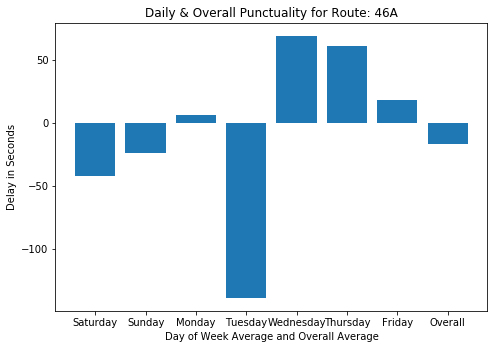

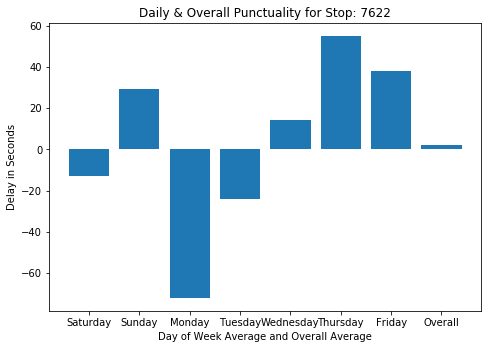

In [59]:

import matplotlib.pyplot as plt
def plot_punctuality_variation_for_route(route):
    with open(str('results/'+route+'/'+route+'_route_punctuality.json'),'r+', encoding='utf-8') as f: 
            route_punctuality = json.load(f)
    
   
    weekdays = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
    # extract week day delays
    puncs = [route_punctuality["daily_punctuality"][weekday]["avg"] for weekday in weekdays]
    # add overall delays
    puncs.append(route_punctuality["overall_avg"])
    weekdays.append('Overall')
  
    # plot bar
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    
    ax.bar(weekdays,puncs)
    plt.title('Daily & Overall Punctuality for Route: '+ route)
    plt.xlabel('Day of Week Average and Overall Average')
    plt.ylabel('Delay in Seconds')

    plt.show()
    
plot_punctuality_variation_for_route('46A')

#repeat same process for stop
def plot_punctuality_variation_for_stop(stop):
    with open(str('results/stops/'+stop+'_punctuality.json'),'r+', encoding='utf-8') as f: 
            stop_punctuality = json.load(f)
    
   
    weekdays = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
    puncs = [stop_punctuality["daily_punctuality"][weekday]["avg"] for weekday in weekdays]
    puncs.append(stop_punctuality["overall_avg"])
    weekdays.append('Overall')
    
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    
    ax.bar(weekdays,puncs)
    plt.title('Daily & Overall Punctuality for Stop: '+ stop)
    plt.xlabel('Day of Week Average and Overall Average')
    plt.ylabel('Delay in Seconds')

    plt.show()
    
plot_punctuality_variation_for_stop("7622")

Clearly the "46A" route selected above's overall punctuality is affected considerably by its lack of delays on Tuesday.

The aim is to make some determination as to what the data tells me and to compare this to the points, I made at the beginning, i.e.

* Correlating punctuality over different days of the week
* Correating punctuality with proximity to Dublin City Centre
* Comparing routes and stops to find the best and worst punctuality across the Dublin Bus Network
* Since Dublin bus creates the bus schedules, I am also evaluating how well Dublin bus predicts bus travel times across the span of a week. Particularly how well the account for traffic in inner city settings.


1. Comparing routes and stops to find the best and worst punctuality across the Dublin Bus Network

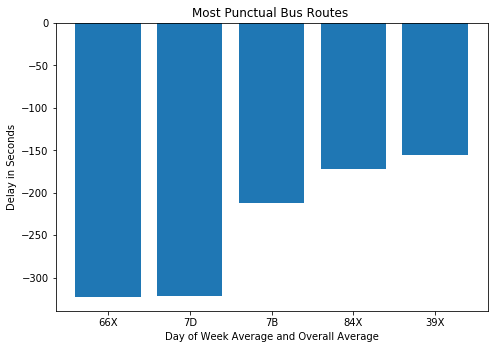

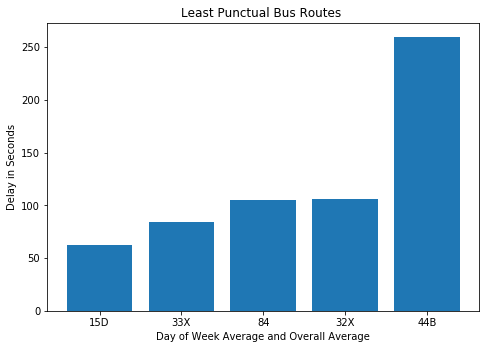

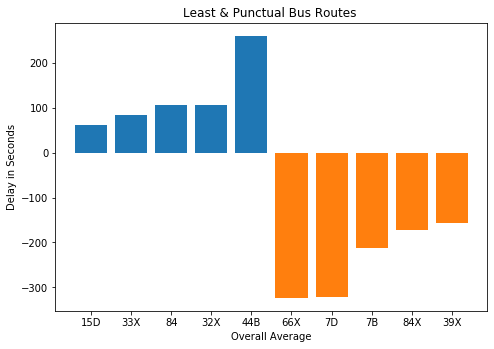

In [78]:
from operator import itemgetter
def find_overall_most_and_least_punctual_routes():
    #vars to hold most and least punctual
    most_punctual_times = []
    most_punctual_route = []
    least_punctual_times = [0,0,0,0,0]
    least_punctual_route = []
    all_puncs = []
    
    
    with open('bus.json') as f:
        bus_routes = json.load(f)
    #loop through routes and get all average punctualities
    for route in bus_routes:
        with open(str('results/'+route+'/'+route+'_route_punctuality.json'),'r+', encoding='utf-8') as f: 
            route_punctuality = json.load(f)
        overall_punc =  route_punctuality['overall_avg']
        all_puncs.append([overall_punc,route])
    # order results based on time [least delay -> most delay]
    all_puncs.sort(key=itemgetter(0))
    
    #extract least delay
    least_punctual_times = [time[0] for time in all_puncs[(len(all_puncs)-5):len(all_puncs)]]
    least_punctual_route =  [time[1] for time in all_puncs[(len(all_puncs)-5):len(all_puncs)]]
    
    #extract most delay
    most_punctual_times = [time[0] for time in all_puncs[:5]]
    most_punctual_route = [time[1] for time in all_puncs[:5]]
    
    #plot bar charts
    fig1 = plt.figure(1)
    
    ax = fig1.add_axes([0,0,1,1])
    ax.bar(most_punctual_route, most_punctual_times)
    plt.title('Most Punctual Bus Routes ')
    plt.xlabel('Day of Week Average and Overall Average')
    plt.ylabel('Delay in Seconds')
    
 
  
    fig2 = plt.figure(2)
    ax1 = fig2.add_axes([0,0,1,1])
    ax1.bar(least_punctual_route, least_punctual_times)
    plt.title('Least Punctual Bus Routes ')
    plt.xlabel('Day of Week Average and Overall Average')
    plt.ylabel('Delay in Seconds')
    
    
    
    fig3 = plt.figure(3)
    ax2 = fig3.add_axes([0,0,1,1])
    ax2.bar(least_punctual_route, least_punctual_times)
    ax2.bar(most_punctual_route, most_punctual_times)
    plt.title('Least & Punctual Bus Routes ')
    plt.xlabel('Overall Average')
    plt.ylabel('Delay in Seconds')
    
find_overall_most_and_least_punctual_routes()  

Looking at these results, I did not find it surprising to see a number of express routes with the earliest arrivals. Since these busses serve considerably stops less tha regular. That notion however was nulled when two express routes appeared as the most delayed. These busses however experienced only a max average delay of approximately 100 seconds vs the 150-200 seconds for the early routes

The 44B is a clear outlier in lateness, being more than twice the second latest bus. Lets examine its results


In [121]:
examine_route_punctuality("44B")

{
  "overall_punctuality": 59372,
  "overall_num": 229,
  "overall_avg": 260,
  "daily_punctuality": {
    "Sunday": {
      "num_results": 0,
      "total": 0,
      "avg:": 0
    },
    "Monday": {
      "num_results": 35,
      "total": -105,
      "avg:": 0,
      "avg": -3
    },
    "Tuesday": {
      "num_results": 65,
      "total": -224,
      "avg:": 0,
      "avg": -3
    },
    "Wednesday": {
      "num_results": 80,
      "total": 59675,
      "avg:": 0,
      "avg": 746
    },
    "Thursday": {
      "num_results": 24,
      "total": 13,
      "avg:": 0,
      "avg": 1
    },
    "Friday": {
      "num_results": 25,
      "total": 13,
      "avg:": 0,
      "avg": 1
    },
    "Saturday": {
      "num_results": 0,
      "total": 0,
      "avg:": 0
    }
  }
}
             Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
num_results     0.0      35       65         80        24      25       0.0
total           0.0    -105     -224      59675        13      1

Clearly a single outlier has skewed this result. With the bus arrving on time every other day. This day must have experienced some considerable event such as a break down. Lets do the same for the two earliest bus routes, the 66X and 7D

In [122]:
examine_route_punctuality("66X")

{
  "overall_punctuality": -74762,
  "overall_num": 231,
  "overall_avg": -323,
  "daily_punctuality": {
    "Sunday": {
      "num_results": 0,
      "total": 0,
      "avg:": 0
    },
    "Monday": {
      "num_results": 3,
      "total": 0,
      "avg:": 0,
      "avg": 0
    },
    "Tuesday": {
      "num_results": 94,
      "total": -37812,
      "avg:": 0,
      "avg": -402
    },
    "Wednesday": {
      "num_results": 29,
      "total": -34964,
      "avg:": 0,
      "avg": -1205
    },
    "Thursday": {
      "num_results": 88,
      "total": -271,
      "avg:": 0,
      "avg": -3
    },
    "Friday": {
      "num_results": 17,
      "total": -1715,
      "avg:": 0,
      "avg": -100
    },
    "Saturday": {
      "num_results": 0,
      "total": 0,
      "avg:": 0
    }
  }
}
             Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
num_results     0.0       3       94         29        88      17       0.0
total           0.0       0   -37812     -34964    

Clearly, a similar principle applies to the 66X, the average delay on Wednesday is almost three times less than the next day (Tuesday), and 12 times the day after that (Friday)

2. Correlating punctuality over different days of the week

To see the variation of delay across the dublin bus network during the week, I get the average of all delays for each day, across every stop

Text(0, 0.5, 'Delay in Seconds')

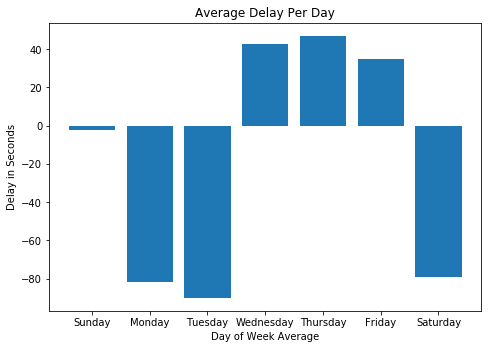

In [123]:
#vars to hold the results
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_total = [0,0,0,0,0,0,0]
weekday_count = [0,0,0,0,0,0,0]
weekday_avg = [0,0,0,0,0,0,0]

with open('results/stops/stops.json') as f:
    stops = json.load(f)

for stop in stops["stops"]:
    # some stops are not in use with Dublin bus as they make changes
    if(os.path.exists(str('results/stops/'+str(stop)+'_punctuality.json'))):
        with open(str('results/stops/'+str(stop)+'_punctuality.json'),'r+', encoding='utf-8') as f: 
            #load in a stops results
            stop_punctuality = json.load(f)
        for i in range(len(weekdays)):
            #if a stop has no results move on to next stop
            if(stop_punctuality["overall_num"] == 0 ):
                break
            #if a particular day has no results, move to next day (some routes dont run on weekends)    
            elif(stop_punctuality["daily_punctuality"][weekdays[i]]["num_results"] == 0):
                continue
                #add the average value to the total count and increment the number of results for that day
            else:
                weekday_total[i] += stop_punctuality["daily_punctuality"][weekdays[i]]["avg"] 
                weekday_count[i] += 1
                
#calculate the average
for i in (range(7)):
    weekday_avg[i] = math.ceil(weekday_total[i]/weekday_count[i])

fig1 = plt.figure(1)
ax = fig1.add_axes([0,0,1,1])
ax.bar(weekdays, weekday_avg)
plt.title('Average Delay Per Day')
plt.xlabel('Day of Week Average')
plt.ylabel('Delay in Seconds')

Examining the plot above, there is a clear difference in the days with respect to punctulaity. However, all of these averages are less than 100 seconds from being exactly on time. Observing this fact, it is clear that dublin bus have well approximated and account for traffice when mapping their timetables across the city. With the above results, it is a commendable effort.

Next I examine the most and least punctual stops across the network. My assumption before running this would be that stops closer to the city centre would be worse affected than those in more suburban areas:

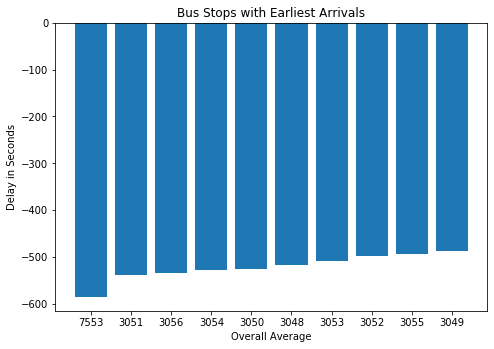

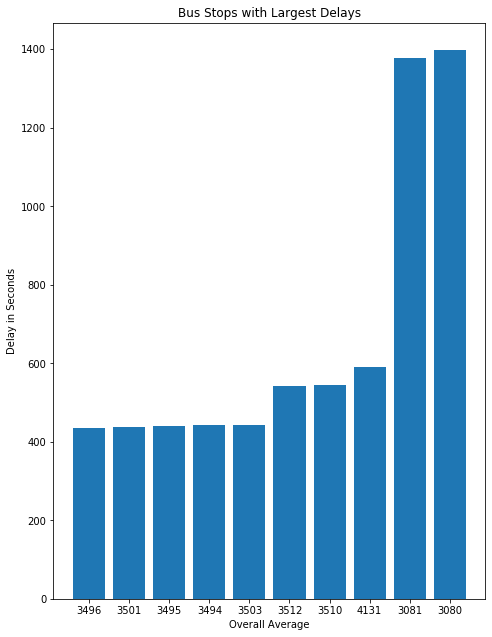

In [73]:
#vars to hold results
most_punctual_times = []
most_punctual_stops = []
least_punctual_times = [0,0,0,0,0]
least_punctual_stops = []
all_puncs = []

#get stop list
with open('results/stops/stops.json') as f:
    stops = json.load(f)

#loop through stops
for stop in stops["stops"]:
    with open(str('results/stops/'+str(stop)+'_punctuality.json'),'r+', encoding='utf-8') as f: 
        # get stop results
        stop_punctuality = json.load(f)
    overall_punc =  stop_punctuality['overall_avg']
    # add the overall punctionality and the associated stop to the list to be sorted
    all_puncs.append([overall_punc,stop])
    
# organise [time, route] pairs based on their delays
all_puncs.sort(key=itemgetter(0))

#extract most and least punctual times
least_punctual_times = [time[0] for time in all_puncs[(len(all_puncs)-10):len(all_puncs)]]
least_punctual_stops =  [str(time[1]) for time in all_puncs[(len(all_puncs)-10):len(all_puncs)]]


most_punctual_times = [time[0] for time in all_puncs[:10]]
most_punctual_stops = [str(time[1]) for time in all_puncs[:10]]

#plot bar charts


fig3 = plt.figure(3)

ax3 = fig3.add_axes([0,0,1,1])
ax3.bar(most_punctual_stops, most_punctual_times)
plt.title('Bus Stops with Earliest Arrivals')
plt.xlabel('Overall Average')
plt.ylabel('Delay in Seconds')



fig4 = plt.figure(4)
ax4 = fig4.add_axes([0,0,1,2])
ax4.bar(least_punctual_stops, least_punctual_times)
plt.title('Bus Stops with Largest Delays')
plt.xlabel('Overall Average')
plt.ylabel('Delay in Seconds')


    


In [9]:
#!pip install ipyleaflet
#!jupyter nbextension enable --py --sys-prefix ipyleaflet    
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix  


Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


3. Correating punctuality with proximity to Dublin City Centre

As previously mentioned, it was important to tet the impact on the proximity to the city centre on the delays of any bus stop. Using a map overlay, I can visualise an appropriate radius for the city centre (Centred on O'Connell Bridg)

Not the above commands must be run in order to see the map. If the map does not display, you may have to close and reopen the book

In [24]:
import ipyleaflet
from ipyleaflet import Map, Marker, Circle
latlng = [53.347373, -6.259185]
# define a map
my_map = Map(center = latlng, zoom=13)
#add marker to show centre point
marker = Marker(location=latlng, title='O\'Connell Bridge')
my_map.add_layer(marker)

#create radius around centre
circle = Circle()
circle.location = (latlng)
circle.radius = 3000
circle.color = "green"
circle.fill_color = "green"
my_map.add_layer(circle)

#show map
display(my_map)

Map(center=[53.347373, -6.259185], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

Knowing an appropriate radius around the city centre, we can then look to determine what stops lie inside this radius and hence make an observation of stops both inside and outside this circle, in relation to their delays

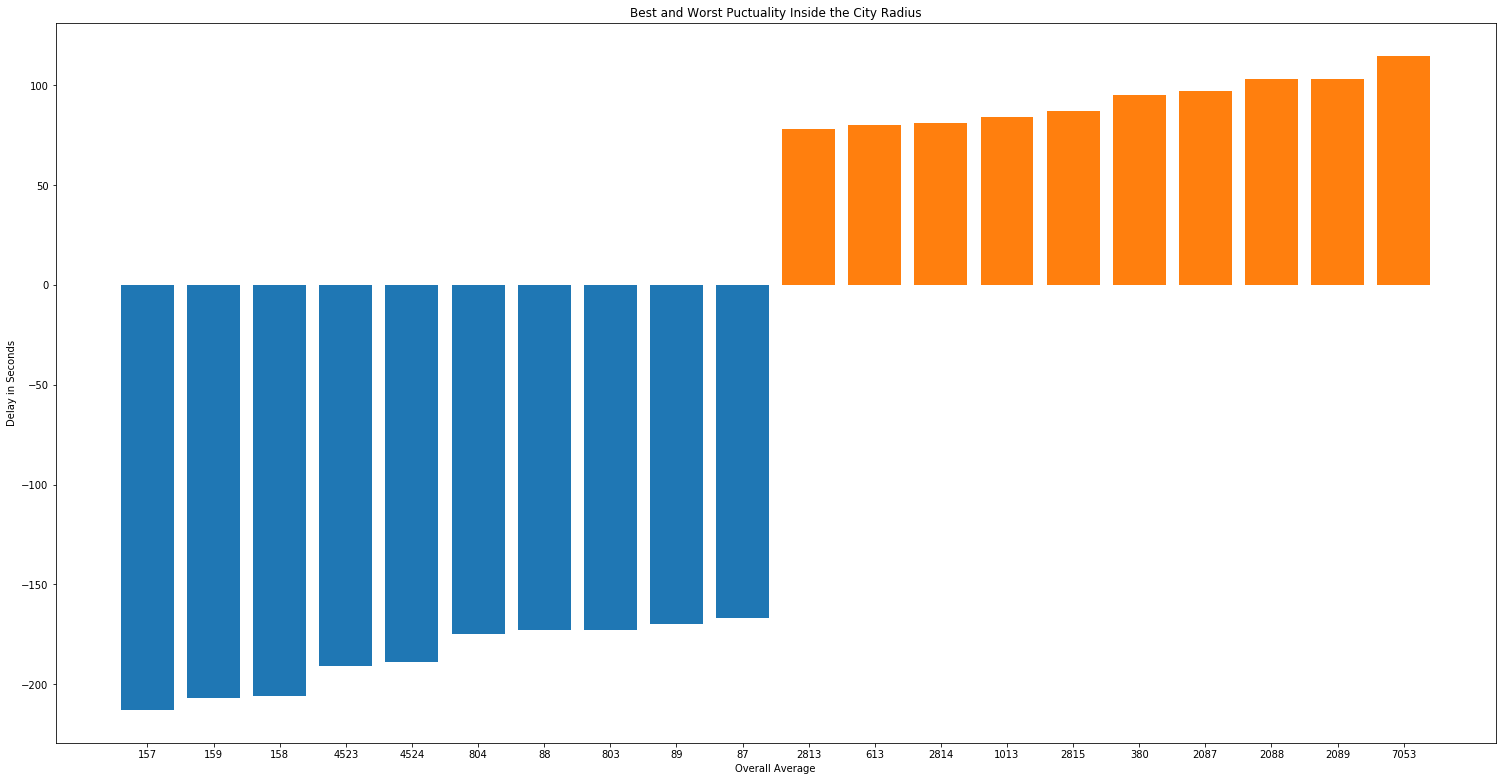

<Figure size 432x288 with 0 Axes>

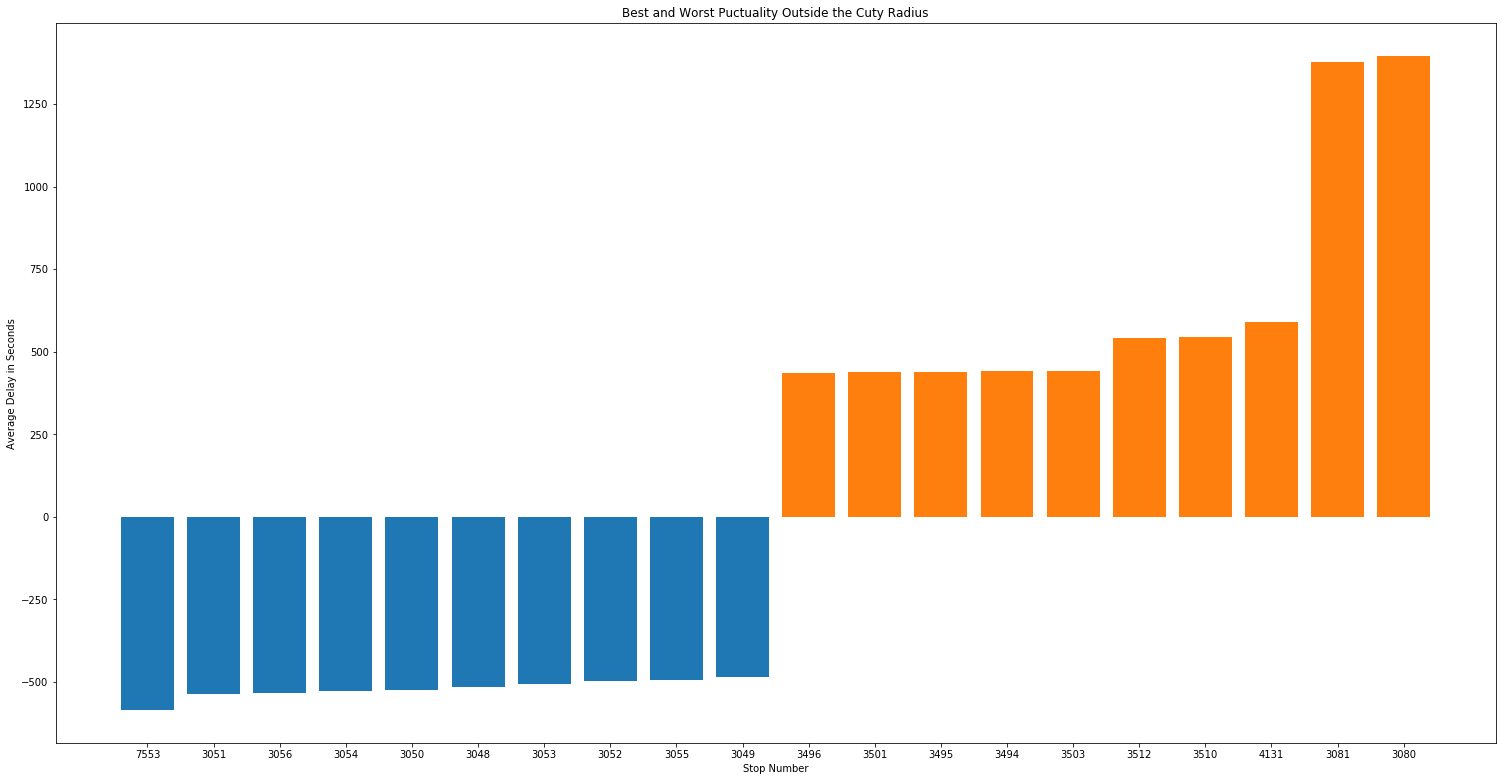

In [124]:
from operator import itemgetter
from math import sin, cos, sqrt, atan2, radians
# this function uses the Haversine Formula to find the distance between two lat,long points
def caluclate_distance_to_city_centre(lat,lng):

    #approx radius of earth
    radius = 6373.0

    lat1 = radians(lat)
    lon1 = radians(lng)
    lat2 = radians(53.347373)
    lon2 = radians(-6.259185)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # dist is in kilometre
    dist = radius * c
    return dist
    

def punctuality_inside_x_km(x):
    #vars to hold best and worst results both inside and outside the radius
    most_punctual_times_inside = []
    most_punctual_stops_inside = []
    least_punctual_times_inside = [0,0,0,0,0]
    least_punctual_stops_inside = []
    all_puncs_inside = []
    
    most_punctual_times_outside = []
    most_punctual_stops_outside = []
    least_punctual_times_outside = [0,0,0,0,0]
    least_punctual_stops_outside = []
    all_puncs_outside = []
    
    #load in all stops
    with open("stops_full.json",'r+', encoding='utf-8') as f: 
        stops_full = json.load(f)
    
    #loop through the stops
    for stop in stops_full:
        if(os.path.exists(str('results/stops/'+stop['stopid']+'_punctuality.json'))):
            with open(str('results/stops/'+stop['stopid']+'_punctuality.json'),'r+', encoding='utf-8') as f: 
                #extract the punctuality
                stop_punctuality = json.load(f)
                overall_punc =  stop_punctuality['overall_avg']
            #check if result is inside or outside the radius
            if(caluclate_distance_to_city_centre(float(stop['latitude']), float(stop['longitude'])) < x): 
                all_puncs_inside.append([overall_punc,stop['stopid']])
            # outside so add to outside results
            else:
                all_puncs_outside.append([overall_punc,stop['stopid']])
     
    #sort results by time
    all_puncs_inside.sort(key=itemgetter(0))
    all_puncs_outside.sort(key=itemgetter(0))
    
    #extract first 5 most and least punctual
    least_punctual_times_inside = [time[0] for time in all_puncs_inside[(len(all_puncs_inside)-10):len(all_puncs_inside)]]
    least_punctual_stops_inside =  [str(time[1]) for time in all_puncs_inside[(len(all_puncs_inside)-10):len(all_puncs_inside)]]
    most_punctual_times_inside = [time[0] for time in all_puncs_inside[:10]]
    most_punctual_stops_inside = [str(time[1]) for time in all_puncs_inside[:10]]
    
    least_punctual_times_outside = [time[0] for time in all_puncs_outside[(len(all_puncs_outside)-10):len(all_puncs_outside)]]
    least_punctual_stops_outside =  [str(time[1]) for time in all_puncs_outside[(len(all_puncs_outside)-10):len(all_puncs_outside)]]
    most_punctual_times_outside = [time[0] for time in all_puncs_outside[:10]]
    most_punctual_stops_outside = [str(time[1]) for time in all_puncs_outside[:10]]
    
  
    #plot inside and outside comparisons
    fig1 = plt.figure(1, figsize=(20, 10))
    ax1 = fig1.add_axes([0,0,1,1])
    ax1.bar(most_punctual_stops_inside, most_punctual_times_inside)
    ax1.bar(least_punctual_stops_inside, least_punctual_times_inside)

    plt.title('Best and Worst Puctuality Inside the City Radius')
    plt.xlabel('Overall Average')
    plt.ylabel('Delay in Seconds')
    
     
  
    #fig2 = plt.figure(2)
    #ax2 = fig2.add_axes([0,0,1,2])
    #ax2.bar(least_punctual_stops_inside, least_punctual_times_inside)
    #plt.title('Bus Stops with Largest Delays inside the City Radius')
    #plt.xlabel('Stop Number')
    #plt.ylabel('Average Delay in Seconds')
    
    fig3 = plt.figure(3, figsize=(20, 10))
    ax3 = fig3.add_axes([0,0,1,1])
    ax3.bar(most_punctual_stops_outside, most_punctual_times_outside)
    ax3.bar(least_punctual_stops_outside, least_punctual_times_outside)
    plt.title('Best and Worst Puctuality Outside the Cuty Radius')
    plt.xlabel('Stop Number')
    plt.ylabel('Average Delay in Seconds')
    
 
  
    # fig4 = plt.figure(4)
    # ax4 = fig4.add_axes([0,0,1,2])
    #ax4.bar(least_punctual_stops_outside, least_punctual_times_outside)
    #plt.title('Bus Stops with Largest Delays Outside the City Radius')
    #plt.xlabel('Stop Number')
    #plt.ylabel('Average Delay in Seconds')

    
punctuality_inside_x_km(5)

Clearly, Dublin bus has well managed the approximation of delays inside the city centre, when compared to outside. The max delay at any stop inside the centre being only 100 seconds. This may be due to:

* One way systems creating more predictable traffic
* Considerably less civilian traffic in the city centre

Whereas the delays and early arrivals outside the city radius were considerably higher, leading me to believe Dublin bus have not been able to predict traffic flow as well, due the areas unpredictable nature, as in:

* More civilian traffic outside the city centre, particularly in suburban regions without bus lanes
* Constantly changing suburban regions due to urban sprawl

#### Conclusion
While this highlights the efficiency of Dublin bus in city areas as an average, and its lack of efficiency further from the centre, there are a number of factors affecting these results

* I need considerably more data to make the observations consistent. In hindsight this api may not have been a good choice considering the time frame
* COVID-19 unfortunatley has skewed these results in a way I cannot compare with normal results. I need results which show case the performance of Dubln Bus in regular traffic rather than the reduced traffic we expect

